In [1]:
import json
import spotipy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import os
import io
import pydotplus
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sqlalchemy import create_engine
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from spotipy.oauth2 import SpotifyClientCredentials
from math import pi
from scipy import misc
client_id = 'acc540a7f8844bd887f02c72b9508732' 
client_secret = '183b3d48db27418a8e6b2b73e14f7e53' 

client_credentials_manager = SpotifyClientCredentials(client_id, client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)


In [2]:
playlist_id='spotify:playlist:37i9dQZF1EM6SkSK3apweL' 
results = sp.playlist(playlist_id)

In [3]:
sourcePlaylistID = '1fCOovfyVaAbUiPlqtRF09'
sourcePlaylist = sp.playlist(playlist_id);
tracks = sourcePlaylist["tracks"];
songs = tracks["items"];

track_ids = []
track_names = []

for i in range(0, len(songs)):
    if songs[i]['track']['id'] != None: # Removes the local tracks in your playlist if there is any
        track_ids.append(songs[i]['track']['id'])
        track_names.append(songs[i]['track']['name'])

features = []
for i in range(0,len(track_ids)):
    audio_features = sp.audio_features(track_ids[i])
    for track in audio_features:
        features.append(track)
        
final_df = pd.DataFrame(features, index = track_names)

In [4]:
final_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
Think About Things,0.871,0.341,3,-8.932,0,0.0576,0.031100,0.000124,0.0838,0.612,127.001,audio_features,3Mq0t6FmKzAjRRkZw7CmD6,spotify:track:3Mq0t6FmKzAjRRkZw7CmD6,https://api.spotify.com/v1/tracks/3Mq0t6FmKzAj...,https://api.spotify.com/v1/audio-analysis/3Mq0...,173386,4
Wolf Like Me,0.363,0.787,7,-5.071,1,0.0429,0.001770,0.004460,0.5310,0.201,175.919,audio_features,03wKMRNYVvw6s9nm4I4jUS,spotify:track:03wKMRNYVvw6s9nm4I4jUS,https://api.spotify.com/v1/tracks/03wKMRNYVvw6...,https://api.spotify.com/v1/audio-analysis/03wK...,279293,4
This Too Shall Pass,0.429,0.667,5,-3.435,1,0.0447,0.000053,0.006370,0.1280,0.395,160.022,audio_features,1SMtj9r8K7Lzh71S5MsIhD,spotify:track:1SMtj9r8K7Lzh71S5MsIhD,https://api.spotify.com/v1/tracks/1SMtj9r8K7Lz...,https://api.spotify.com/v1/audio-analysis/1SMt...,188120,4
Solar Sailer - Remixed by Pretty Lights,0.363,0.733,3,-8.478,0,0.2080,0.026000,0.472000,0.2470,0.406,95.803,audio_features,4OgB6TRmIGBRT4NoFxxIQd,spotify:track:4OgB6TRmIGBRT4NoFxxIQd,https://api.spotify.com/v1/tracks/4OgB6TRmIGBR...,https://api.spotify.com/v1/audio-analysis/4OgB...,272853,5
Blast Doors,0.585,0.791,11,-7.587,0,0.0592,0.074500,0.000017,0.0915,0.850,159.999,audio_features,6EGjHfnRNMVpdKb5Gy9nlh,spotify:track:6EGjHfnRNMVpdKb5Gy9nlh,https://api.spotify.com/v1/tracks/6EGjHfnRNMVp...,https://api.spotify.com/v1/audio-analysis/6EGj...,210227,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
The Promise,0.527,0.906,0,-4.076,1,0.0383,0.000150,0.000000,0.1100,0.551,125.985,audio_features,0tSzbyEYEdTOTeQLzOStBj,spotify:track:0tSzbyEYEdTOTeQLzOStBj,https://api.spotify.com/v1/tracks/0tSzbyEYEdTO...,https://api.spotify.com/v1/audio-analysis/0tSz...,220413,4
Doin' it Right (feat. Panda Bear),0.804,0.451,6,-8.207,1,0.0949,0.388000,0.000022,0.0924,0.190,178.061,audio_features,36c4JohayB9qd64eidQMBi,spotify:track:36c4JohayB9qd64eidQMBi,https://api.spotify.com/v1/tracks/36c4JohayB9q...,https://api.spotify.com/v1/audio-analysis/36c4...,251293,4
Little Talks,0.637,0.263,5,-9.094,0,0.0399,0.873000,0.000000,0.1640,0.487,97.423,audio_features,1ulDt6ySVbMbzZCBO6hSfb,spotify:track:1ulDt6ySVbMbzZCBO6hSfb,https://api.spotify.com/v1/tracks/1ulDt6ySVbMb...,https://api.spotify.com/v1/audio-analysis/1ulD...,219760,4
Royals,0.674,0.428,7,-9.504,1,0.1220,0.121000,0.000000,0.1320,0.337,84.878,audio_features,2dLLR6qlu5UJ5gk0dKz0h3,spotify:track:2dLLR6qlu5UJ5gk0dKz0h3,https://api.spotify.com/v1/tracks/2dLLR6qlu5UJ...,https://api.spotify.com/v1/audio-analysis/2dLL...,190185,4


In [5]:
playlist_df=final_df[["id", "acousticness", "danceability", "duration_ms", 
                         "energy", "instrumentalness",  "key", "liveness",
                         "loudness", "mode", "speechiness", "tempo", "valence", "time_signature"]]
playlist_df.head(100)

,id,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,time_signature
Think About Things,3Mq0t6FmKzAjRRkZw7CmD6,0.031100,0.871,173386,0.341,0.000124,3,0.0838,-8.932,0,0.0576,127.001,0.612,4
Wolf Like Me,03wKMRNYVvw6s9nm4I4jUS,0.001770,0.363,279293,0.787,0.004460,7,0.5310,-5.071,1,0.0429,175.919,0.201,4
This Too Shall Pass,1SMtj9r8K7Lzh71S5MsIhD,0.000053,0.429,188120,0.667,0.006370,5,0.1280,-3.435,1,0.0447,160.022,0.395,4
Solar Sailer - Remixed by Pretty Lights,4OgB6TRmIGBRT4NoFxxIQd,0.026000,0.363,272853,0.733,0.472000,3,0.2470,-8.478,0,0.2080,95.803,0.406,5
Blast Doors,6EGjHfnRNMVpdKb5Gy9nlh,0.074500,0.585,210227,0.791,0.000017,11,0.0915,-7.587,0,0.0592,159.999,0.850,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
The Promise,0tSzbyEYEdTOTeQLzOStBj,0.000150,0.527,220413,0.906,0.000000,0,0.1100,-4.076,1,0.0383,125.985,0.551,4
Doin' it Right (feat. Panda Bear),36c4JohayB9qd64eidQMBi,0.388000,0.804,251293,0.451,0.000022,6,0.0924,-8.207,1,0.0949,178.061,0.190,4
Little Talks,1ulDt6ySVbMbzZCBO6hSfb,0.873000,0.637,219760,0.263,0.000000,5,0.1640,-9.094,0,0.0399,97.423,0.487,4
Royals,2dLLR6qlu5UJ5gk0dKz0h3,0.121000,0.674,190185,0.428,0.000000,7,0.1320,-9.504,1,0.1220,84.878,0.337,4


In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [7]:
playlist_df['danceability'] = playlist_df['danceability'].apply(lambda x: x*1000)
playlist_df.head(100)

C:\Users\Greg\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,id,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,time_signature
Think About Things,3Mq0t6FmKzAjRRkZw7CmD6,0.031100,871.0,173386,0.341,0.000124,3,0.0838,-8.932,0,0.0576,127.001,0.612,4
Wolf Like Me,03wKMRNYVvw6s9nm4I4jUS,0.001770,363.0,279293,0.787,0.004460,7,0.5310,-5.071,1,0.0429,175.919,0.201,4
This Too Shall Pass,1SMtj9r8K7Lzh71S5MsIhD,0.000053,429.0,188120,0.667,0.006370,5,0.1280,-3.435,1,0.0447,160.022,0.395,4
Solar Sailer - Remixed by Pretty Lights,4OgB6TRmIGBRT4NoFxxIQd,0.026000,363.0,272853,0.733,0.472000,3,0.2470,-8.478,0,0.2080,95.803,0.406,5
Blast Doors,6EGjHfnRNMVpdKb5Gy9nlh,0.074500,585.0,210227,0.791,0.000017,11,0.0915,-7.587,0,0.0592,159.999,0.850,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
The Promise,0tSzbyEYEdTOTeQLzOStBj,0.000150,527.0,220413,0.906,0.000000,0,0.1100,-4.076,1,0.0383,125.985,0.551,4
Doin' it Right (feat. Panda Bear),36c4JohayB9qd64eidQMBi,0.388000,804.0,251293,0.451,0.000022,6,0.0924,-8.207,1,0.0949,178.061,0.190,4
Little Talks,1ulDt6ySVbMbzZCBO6hSfb,0.873000,637.0,219760,0.263,0.000000,5,0.1640,-9.094,0,0.0399,97.423,0.487,4
Royals,2dLLR6qlu5UJ5gk0dKz0h3,0.121000,674.0,190185,0.428,0.000000,7,0.1320,-9.504,1,0.1220,84.878,0.337,4


In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

v=TfidfVectorizer(sublinear_tf=True, ngram_range=(1, 6), max_features=10000)
X_names_sparse = v.fit_transform(track_names)
X_names_sparse.shape

(100, 589)

In [9]:
# Analyze feature importances
from sklearn.ensemble.forest import RandomForestRegressor, RandomForestClassifier

X_train = playlist_df.drop(['id', 'danceability'], axis=1)
y_train = playlist_df['danceability']
forest = RandomForestClassifier(random_state=42, max_depth=5, max_features=12)
forest.fit(X_train, y_train)
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature rankings
print("Feature ranking:")
  
for f in range(len(importances)):
    print("%d. %s %f " % (f + 1, 
            X_train.columns[f], 
            importances[indices[f]]))

C:\Users\Greg\anaconda3\envs\mlenv\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.ensemble.forest module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)


Feature ranking:
1. acousticness 0.125032 
2. duration_ms 0.109829 
3. energy 0.108751 
4. instrumentalness 0.108540 
5. key 0.102905 
6. liveness 0.099128 
7. loudness 0.093022 
8. mode 0.091851 
9. speechiness 0.070477 
10. tempo 0.038371 
11. valence 0.035958 
12. time_signature 0.016138 


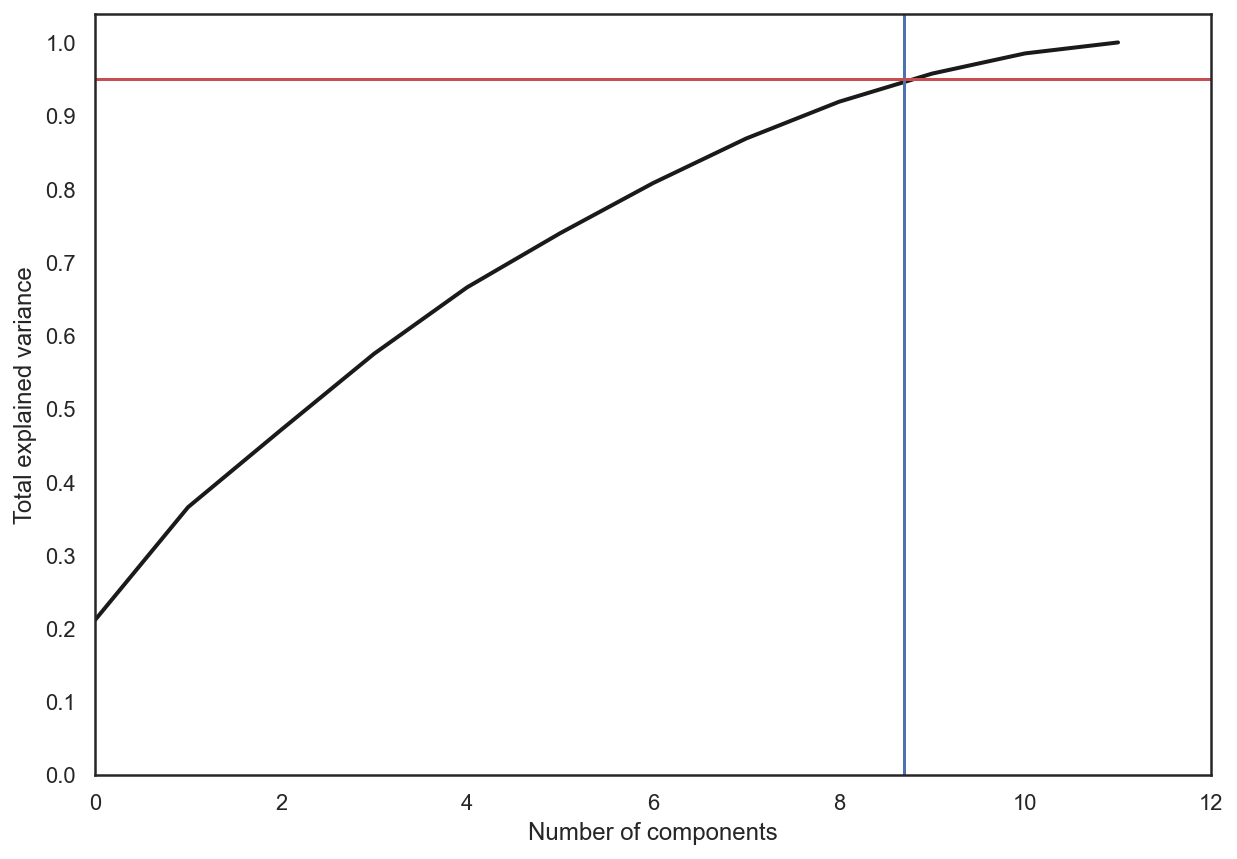

In [10]:
from sklearn import decomposition
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style='white')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

X_scaled = StandardScaler().fit_transform(X_train)

pca = decomposition.PCA().fit(X_scaled)

plt.figure(figsize=(10,7))
plt.plot(np.cumsum(pca.explained_variance_ratio_), color='k', lw=2)
plt.xlabel('Number of components')
plt.ylabel('Total explained variance')
plt.xlim(0, 12)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.axvline(8.7, c='b') 
plt.axhline(0.95, c='r')
plt.show();

In [11]:
# Fit your dataset to the optimal pca
pca1 = decomposition.PCA(n_components=8)
X_pca = pca1.fit_transform(X_scaled)

In [12]:
from sklearn.manifold import TSNE

tsne = TSNE(random_state=17)
X_tsne = tsne.fit_transform(X_scaled)

In [13]:
from scipy.sparse import csr_matrix, hstack

X_train_last = csr_matrix(hstack([X_pca, X_names_sparse]))

In [14]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV
import warnings
warnings.filterwarnings('ignore')

# Initialize a stratified split for the validation process
skf = StratifiedKFold(n_splits=8, shuffle=True, random_state=42)

In [15]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV
import warnings
warnings.filterwarnings('ignore')

# Initialize a stratified split for the validation process
skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=19)

In [16]:
# Decision Trees First
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()

tree_params = {'max_depth': range(1,11), 'max_features': range(4,19)}

tree_grid = GridSearchCV(tree, tree_params, cv=skf, n_jobs=-1, verbose=True)

tree_grid.fit(X_train_last, y_train)
tree_grid.best_estimator_, tree_grid.best_score_

Fitting 3 folds for each of 150 candidates, totalling 450 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 408 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 450 out of 450 | elapsed:    1.8s finished


(DecisionTreeClassifier(max_depth=7, max_features=7), 0.030005941770647655)

In [17]:
# Random Forests second

parameters = {'max_features': [4, 7, 8, 10], 'min_samples_leaf': [1, 3, 5, 8], 'max_depth': [3, 5, 8]}
rfc = RandomForestClassifier(n_estimators=100, random_state=42, 
                             n_jobs=-1, oob_score=True)
gcv1 = GridSearchCV(rfc, parameters, n_jobs=-1, cv=skf, verbose=1)
gcv1.fit(X_train_last, y_train)
gcv1.best_estimator_, gcv1.best_score_

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 3 folds for each of 48 candidates, totalling 144 fits


[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 144 out of 144 | elapsed:    3.4s finished


(RandomForestClassifier(max_depth=5, max_features=4, n_jobs=-1, oob_score=True,
                        random_state=42),
 0.040106951871657755)

In [18]:
# kNN third
from sklearn.neighbors import KNeighborsClassifier

knn_params = {'n_neighbors': range(1, 10)}
knn = KNeighborsClassifier(n_jobs=-1)

knn_grid = GridSearchCV(knn, knn_params, cv=skf, n_jobs=-1, verbose=True)
knn_grid.fit(X_train_last, y_train)
knn_grid.best_params_, knn_grid.best_score_

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=-1)]: Done  24 out of  27 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:    0.1s finished


({'n_neighbors': 1}, 0.0)

In [19]:
rec_tracks = []
for i in playlist_df['id'].values.tolist():
    rec_tracks += sp.recommendations(seed_tracks=[i], limit=int(len(playlist_df)/2))['tracks'];

rec_track_ids = []
rec_track_names = []
for i in rec_tracks:
    rec_track_ids.append(i['id'])
    rec_track_names.append(i['name'])

rec_features = []
for i in range(0,len(rec_track_ids)):
    rec_audio_features = sp.audio_features(rec_track_ids[i])
    for track in rec_audio_features:
        rec_features.append(track)
        
rec_playlist_df = pd.DataFrame(rec_features, index = rec_track_ids)
rec_playlist_df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
4hs0ol9UoDjDzuT3LHgaFQ,0.576,0.623,0,-5.928,0,0.0610,0.7530,0.012600,0.206,0.176,97.896,audio_features,4hs0ol9UoDjDzuT3LHgaFQ,spotify:track:4hs0ol9UoDjDzuT3LHgaFQ,https://api.spotify.com/v1/tracks/4hs0ol9UoDjD...,https://api.spotify.com/v1/audio-analysis/4hs0...,258707,4
0vQH42DnQe4F0i7uxlcY0t,0.545,0.661,9,-7.078,0,0.0694,0.3430,0.005570,0.224,0.196,200.112,audio_features,0vQH42DnQe4F0i7uxlcY0t,spotify:track:0vQH42DnQe4F0i7uxlcY0t,https://api.spotify.com/v1/tracks/0vQH42DnQe4F...,https://api.spotify.com/v1/audio-analysis/0vQH...,214637,4
0RJ9YsklvdpEWfUzOgQkcT,0.726,0.343,10,-9.230,1,0.0390,0.8750,0.000000,0.108,0.416,83.053,audio_features,0RJ9YsklvdpEWfUzOgQkcT,spotify:track:0RJ9YsklvdpEWfUzOgQkcT,https://api.spotify.com/v1/tracks/0RJ9YsklvdpE...,https://api.spotify.com/v1/audio-analysis/0RJ9...,174837,4
0b8RYSlaOcmlraFF1dpJF4,0.717,0.707,4,-9.495,1,0.0628,0.3840,0.000117,0.161,0.206,105.014,audio_features,0b8RYSlaOcmlraFF1dpJF4,spotify:track:0b8RYSlaOcmlraFF1dpJF4,https://api.spotify.com/v1/tracks/0b8RYSlaOcml...,https://api.spotify.com/v1/audio-analysis/0b8R...,204280,4
4LeXaYxiCTANYSq9lteTF1,0.728,0.689,4,-6.696,0,0.0474,0.0456,0.530000,0.424,0.824,123.006,audio_features,4LeXaYxiCTANYSq9lteTF1,spotify:track:4LeXaYxiCTANYSq9lteTF1,https://api.spotify.com/v1/tracks/4LeXaYxiCTAN...,https://api.spotify.com/v1/audio-analysis/4LeX...,237107,4
